In [ ]:
#Kaggle Dataset: "https://www.kaggle.com/datasets/shayanfazeli/heartbeat"

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
import tensorflow as tf

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score #confusion_matrix:measurement for classification models #accuracy_score:accuracy of a classification model

In [5]:
from tensorflow.compat.v1 import ConfigProto #TensorFlow to allocate only as much GPU memory as is needed by the process
from tensorflow.compat.v1 import InteractiveSession #Control over how TensorFlow interacts with system resource

In [6]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [8]:
import matplotlib.pyplot as plt

In [9]:
train_df = pd.read_csv("mitbih_train.csv", header=None)
test_df = pd.read_csv("mitbih_test.csv", header=None)
print(train_df.shape) #Size of the array (rows_columns)
print(test_df.shape)

(87554, 188)
(21892, 188)


In [10]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Unique Classes in the Training & Testing Dataset:
print(train_df[train_df.columns[-1]].unique()) #-1 is used to dynamically refernce to the last column
print(train_df[test_df.columns[-1]].unique())

[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]


In [14]:
train_x = np.array(train_df[train_df.columns[0:-1]], dtype=np.float32) #selects all columns except the last one (Features)
train_y = np.array(train_df[train_df.columns[-1:]], dtype=np.float32) #selects last column (Labels)

test_x = np.array(train_df[test_df.columns[0:-1]], dtype=np.float32) 
test_y = np.array(train_df[test_df.columns[-1:]], dtype=np.float32)

In [15]:
train_x.shape, train_y.shape

((87554, 187), (87554, 1))

In [16]:
test_x.shape, test_y.shape

((87554, 187), (87554, 1))

In [17]:
#last column in both the training and test datasets has the same number of rows and columns for some reason

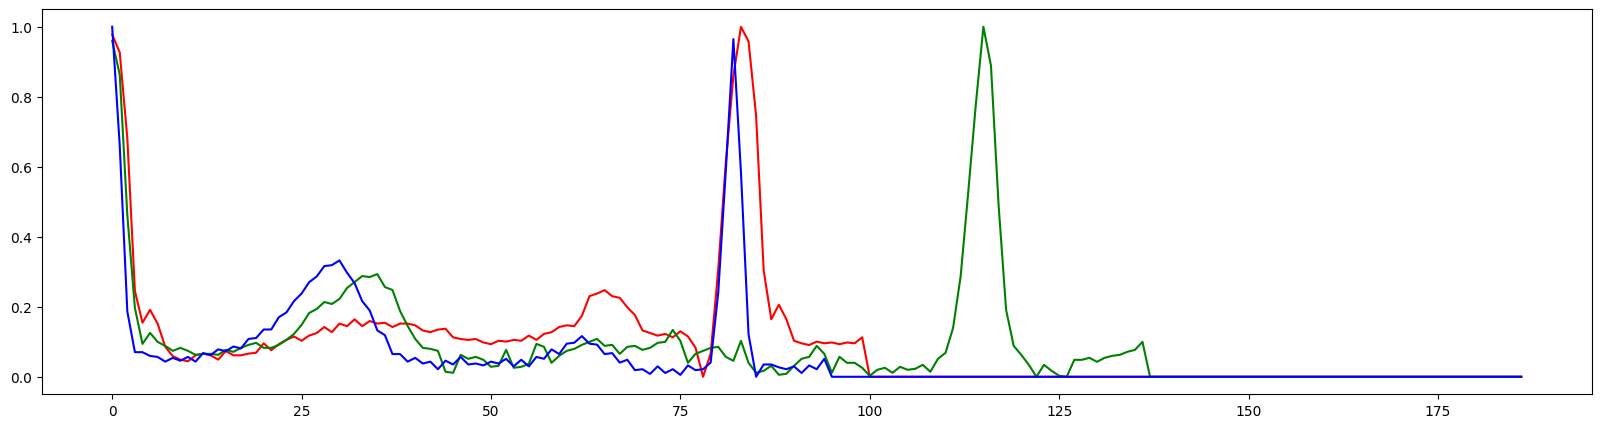

In [18]:
#Time series data of a single ECG beat
fig = plt.figure(figsize=(20,5)) #20x5 size
ax = fig.add_subplot(1,1,1) 
ax.plot(train_x[0], color="r")
ax.plot(train_x[1], color="g")
ax.plot(train_x[2], color="b")
plt.show()